In [1]:
import pickle 
import numpy as np 
import pandas as pd
import networkx as nx
from tqdm import tqdm
import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from itertools import combinations
import plotly.graph_objects as go
import plotly.subplots as sp
import matplotlib.cm as cm

from src.utils.data_utils import *
from src.utils.general_utils import *
from src.utils.career import *

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [3]:
movie_path = 'data/Movie.pkl'
actors_path = 'data/Actor.pkl'

with open(movie_path, 'rb') as file:
    Movie = pickle.load(file)

with open(actors_path, 'rb') as file:
    Actor = pickle.load(file)

C:\Users\pierr\AppData\Local\Temp\ipykernel_8944\4209001929.py:5: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  Movie = pickle.load(file)


In [4]:
Actor_career = create_actor_career_dataset(Actor)

In [5]:
Career_dataset_std = prepare_career_dataset_KNN(Actor_career)

100%|██████████| 9/9 [00:04<00:00,  2.01it/s]


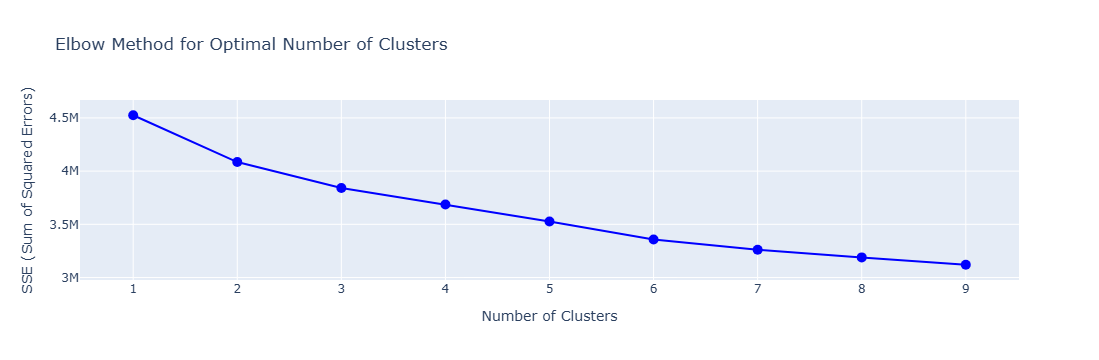

In [6]:
plot_elbow_method(Career_dataset_std,range(1,10),random_state=50)

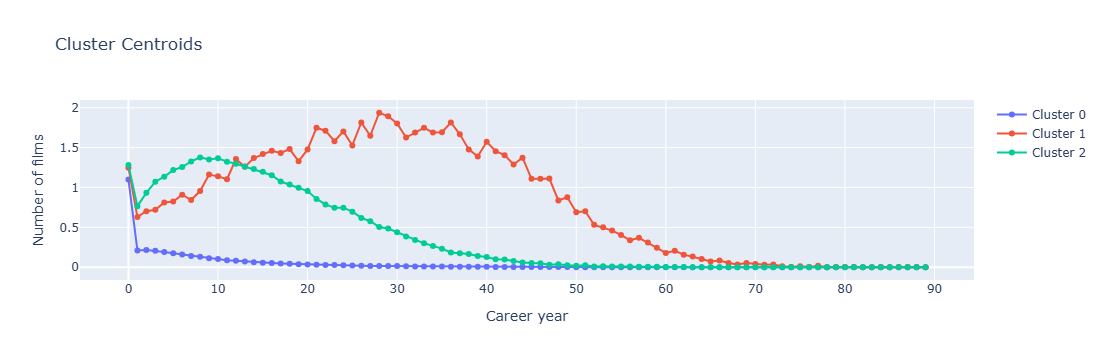

In [7]:
labels = knn_clustering_and_plot(Career_dataset_std,3,Actor_career,random_state=50)
Actor_career['Labels'] = labels

In [8]:
#One non actor exemple
career_plot(Actor_career,"Yao Ming")

In [9]:
#most prolific
career_plot(Actor_career,"Mel Blanc")

In [10]:
#Well known and very prolific
career_plot(Actor_career,"Samuel L. Jackson")

In [11]:
#Well known and very prolific
career_plot(Actor_career,"Johnny Depp")

C:\Users\pierr\AppData\Local\Temp\ipykernel_8944\319795692.py:6: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



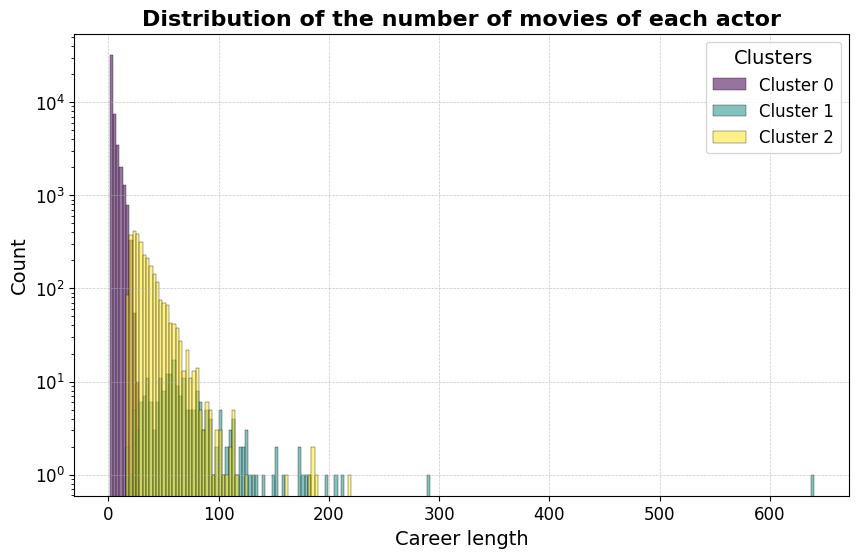

In [12]:
Actors_0 = Actor_career[Actor_career['Labels']==0]
Actors_1 = Actor_career[Actor_career['Labels']==1]
Actors_2 = Actor_career[Actor_career['Labels']==2]


viridis = cm.get_cmap('viridis', 3)  # Get 3 evenly spaced colors
colors = [viridis(i) for i in range(3)]


plt.figure(figsize=(10, 6))
min_height = min(Actors_0['Total_nbr_films'].min(), Actors_1['Total_nbr_films'].min())
max_height = max(Actors_0['Total_nbr_films'].max(), Actors_1['Total_nbr_films'].max())
bin_width = 3
bins = np.arange(min_height, max_height + bin_width, bin_width)


sns.histplot(data=Actors_0, x='Total_nbr_films', bins=bins, kde=False, alpha=0.55, color=colors[0], label='Cluster 0')
sns.histplot(data=Actors_1, x='Total_nbr_films', bins=bins, kde=False, alpha=0.55, color=colors[1], label='Cluster 1')
sns.histplot(data=Actors_2, x='Total_nbr_films', bins=bins, kde=False, alpha=0.55, color=colors[2], label='Cluster 2')


plt.yscale('log')
plt.title("Distribution of the number of movies of each actor", fontsize=16, fontweight='bold')
plt.xlabel("Career length", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(title="Clusters", fontsize=12, title_fontsize=14, loc='upper right')

plt.show()

C:\Users\pierr\AppData\Local\Temp\ipykernel_8944\62232152.py:12: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



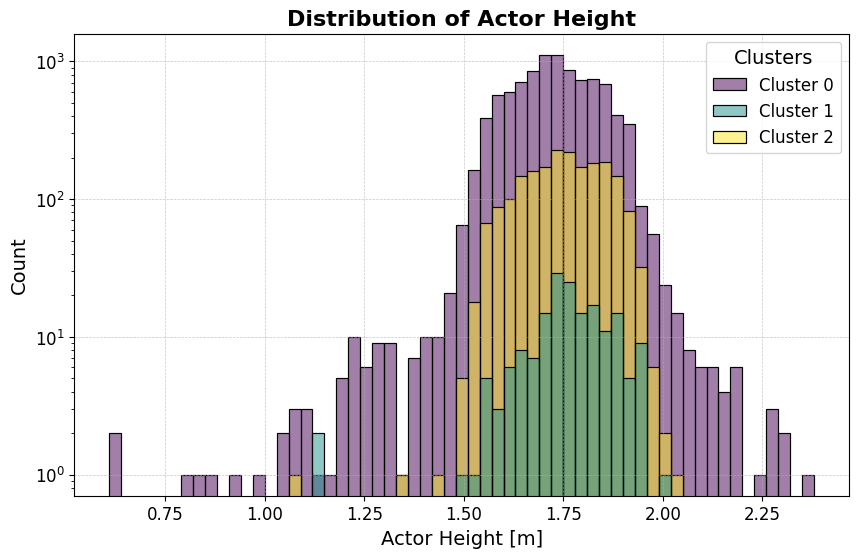

In [13]:
Actor_career = Actor_career[Actor_career["actor_height"] < 3].reset_index(drop=True)
Actors_0 = Actor_career[Actor_career['Labels']==0]
Actors_1 = Actor_career[Actor_career['Labels']==1]
Actors_2 = Actor_career[Actor_career['Labels']==2]

min_height = min(Actors_0['actor_height'].min(), Actors_1['actor_height'].min())
max_height = max(Actors_0['actor_height'].max(), Actors_1['actor_height'].max())
bin_width = 0.03
bins = np.arange(min_height, max_height + bin_width, bin_width)
import matplotlib.cm as cm

viridis = cm.get_cmap('viridis', 3)  # Get 3 evenly spaced colors
colors = [viridis(i) for i in range(3)]
plt.figure(figsize=(10, 6))
# Create the histograms
sns.histplot(data=Actors_0, x='actor_height', bins=bins, kde=False, alpha=0.5, color=colors[0], label='Cluster 0')
sns.histplot(data=Actors_2, x='actor_height', bins=bins, kde=False, alpha=0.5, color=colors[2], label='Cluster 2')
sns.histplot(data=Actors_1, x='actor_height', bins=bins, kde=False, alpha=0.5, color=colors[1], label='Cluster 1')


# Add labels and legend
plt.yscale('log')
plt.title("Distribution of Actor Height", fontsize=16, fontweight='bold')
plt.xlabel("Actor Height [m]", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(title="Clusters", fontsize=12, title_fontsize=14, loc='upper right')

handles, labels = plt.gca().get_legend_handles_labels()
order = [0, 2, 1]  
plt.legend(
    [handles[i] for i in order],
    [labels[i] for i in order],
    title="Clusters",
    fontsize=12,
    title_fontsize=14,
    loc='upper right',
)

plt.show()

In [14]:
Actors_1[Actors_1["actor_height"]<1.5]

Freebase_actor_ID   actor_name   actor_DOB actor_gender actor_height  \
21           /m/0127zc  Kenny Baker  1934-08-24            M         1.12   
449          /m/019803   June Foray  1917-09-18            F       1.4986   
3459         /m/02y3dh  Billy Barty  1924-10-25            M        1.143   

     ethnicity                                  Freebase_movie_ID  \
21        None  [/m/0fdv3, /m/0536z8, /m/01_bnz, /m/06vxr7, /m...   
449       None  [/m/023p33, /m/03d0w2h, /m/02rbtsm, /m/0d_wg7,...   
3459      None  [/m/027x4qz, /m/0ds0nf_, /m/09jnxn, /m/05vjbt,...   

                               actor_age_atmovierelease  Career_Start_age  \
21    [70, 3, 67, 67, 64, 67, 48, 43, 53, 47, 45, 46...                 3   
449   [32, 46, 40, 71, 48, 73, 39, 39, 39, 38, 37, 6...                22   
3459  [6, 5, 66, 40, 9, 4, 66, 40, 9, 5, 62, 56, 7, ...                 4   

      Career_End_age  ...  Nbr_films_83  Nbr_films_84  Nbr_films_85  \
21                70  ...           0.0           0.0           0.0   
449               88  ...           0.0           0.0           0.0   
3459              67  ...           0.0           0.0           0.0   

      Nbr_films_86  Nbr_films_87  Nbr_films_88  Nbr_films_89  Nbr_films_90  \
21             0.0           0.0           0.0           0.0           0.0   
449            0.0           0.0           0.0           0.0           0.0   
3459           0.0           0.0           0.0           0.0           0.0   

      Total_nbr_films  Labels  
21               16.0       1  
449              52.0       1  
3459             34.0       1  

[3 rows x 103 columns]

C:\Users\pierr\AppData\Local\Temp\ipykernel_8944\572701136.py:12: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



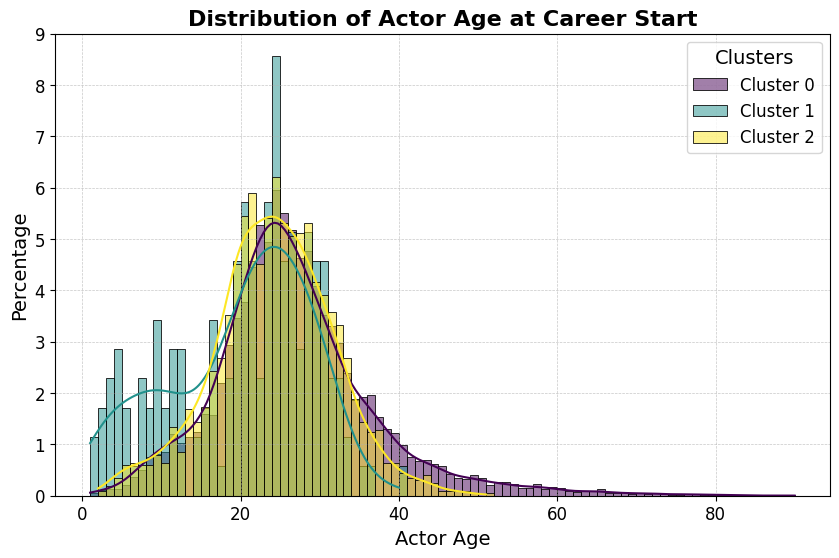

In [15]:
Actors_0 = Actor_career[Actor_career['Labels']==0]
Actors_1 = Actor_career[Actor_career['Labels']==1]
Actors_2 = Actor_career[Actor_career['Labels']==2]

plt.figure(figsize=(10, 6))

min_height = min(Actors_0['Career_Start_age'].min(), Actors_1['Career_Start_age'].min())
max_height = max(Actors_0['Career_Start_age'].max(), Actors_1['Career_Start_age'].max())
bin_width = 1
bins = np.arange(min_height, max_height + bin_width, bin_width)

viridis = cm.get_cmap('viridis', 3)  # Get 3 evenly spaced colors
colors = [viridis(i) for i in range(3)]


# Plot histograms and KDE
sns.histplot(data=Actors_0, x='Career_Start_age', bins=bins, kde=True, alpha=0.5, color=colors[0], stat='percent', label='Cluster 0')
sns.histplot(data=Actors_1, x='Career_Start_age', bins=bins, kde=True, alpha=0.5, color=colors[1], stat='percent', label='Cluster 1')
sns.histplot(data=Actors_2, x='Career_Start_age', bins=bins, kde=True, alpha=0.5, color=colors[2], stat='percent', label='Cluster 2')

# Customize the plot
plt.title("Distribution of Actor Age at Career Start", fontsize=16, fontweight='bold')
plt.xlabel("Actor Age", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(title="Clusters", fontsize=12, title_fontsize=14, loc='upper right')

plt.show()

C:\Users\pierr\AppData\Local\Temp\ipykernel_8944\2242914884.py:14: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



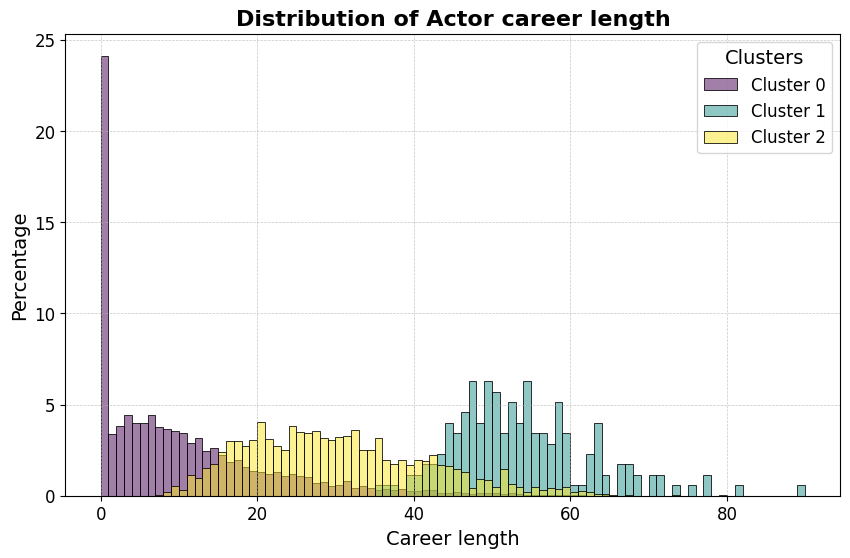

In [16]:
Actors_0 = Actor_career[Actor_career['Labels']==0]
Actors_1 = Actor_career[Actor_career['Labels']==1]
Actors_2 = Actor_career[Actor_career['Labels']==2]


plt.figure(figsize=(10, 6))

min_height = min(Actors_0['Career_length'].min(), Actors_1['Career_length'].min())
max_height = max(Actors_0['Career_length'].max(), Actors_1['Career_length'].max())
bin_width = 1
bins = np.arange(min_height, max_height + bin_width, bin_width)


viridis = cm.get_cmap('viridis', 3)  # Get 3 evenly spaced colors
colors = [viridis(i) for i in range(3)]


# Plot the histograms using the same bins
sns.histplot(data=Actors_0, x='Career_length', bins=bins, kde=False, alpha=0.5, color=colors[0], stat='percent', label='Cluster 0')
sns.histplot(data=Actors_1, x='Career_length', bins=bins, kde=False, alpha=0.5, color=colors[1],  stat='percent',label='Cluster 1')
sns.histplot(data=Actors_2, x='Career_length', bins=bins, kde=False, alpha=0.5, color=colors[2],  stat='percent',label='Cluster 2')

# Customize the plot
plt.title("Distribution of Actor career length", fontsize=16, fontweight='bold')
plt.xlabel("Career length", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(title="Clusters", fontsize=12, title_fontsize=14, loc='upper right')

plt.show()

In [17]:
plot_gender_proportions_by_cluster(Actor_career)

# A partir d'ici c'est juste du code en backup. A ne pas utiliser pour le rendu

In [15]:
Nbr_films = [f"Nbr_films_{i+1}" for i in range(100)]
Degree = [f"Degree_{i+1}" for i in range(100)]
Centrality = [f"Centrality_{i+1}" for i in range(100)]


Actor_career = pd.concat(
    [Actor.copy(), pd.DataFrame(0.0, index=Actor.index, columns=Nbr_films), pd.DataFrame(0.0, index=Actor.index, columns=Degree), pd.DataFrame(0.0, index=Actor.index, columns=Centrality)], axis=1)

In [ ]:
movie_releasedates = range(1920,2020) 
Actor_career['carrer_year'] = 0

for date in tqdm(movie_releasedates):

    played_together = create_actor_network(Actor_career,Movie, min_movies=1, max_releasedate=date)

    nan_nodes = [node for node in played_together.nodes if pd.isna(node)]
    played_together.remove_nodes_from(nan_nodes)

    degrees = dict(played_together.degree())
    eigenvector_centrality = nx.eigenvector_centrality(played_together, max_iter=1000)
    eigenvector_values = np.array(list(eigenvector_centrality.values()))

    std = np.std(eigenvector_values)
    standardized_eigenvector_centrality = {node: val / std for node, val in eigenvector_centrality.items()}


    actor_id_to_idx = pd.Series(Actor_career.index, index=Actor_career["Freebase_actor_ID"]).to_dict()
    num_actors = len(Actor_career)
    degree_updates = np.zeros(num_actors, dtype=np.float32)
    centrality_updates = np.zeros(num_actors, dtype=np.float32)
    career_year_updates = np.zeros(num_actors, dtype=np.int32)


    for actor_id in played_together.nodes():
        if actor_id in actor_id_to_idx:
            actor_idx = actor_id_to_idx[actor_id]
            career_year = Actor_career.at[actor_idx, "carrer_year"]
            
            degree_updates[actor_idx] = degrees.get(actor_id, 0)
            centrality_updates[actor_idx] = standardized_eigenvector_centrality.get(actor_id, 0.0)
            career_year_updates[actor_idx] = career_year

            Actor_career.at[actor_idx, "carrer_year"] += 1


    for actor_idx, career_year in enumerate(career_year_updates):
        if career_year > 0:  # Only update valid career years
            Actor_career.at[actor_idx, f"Degree_{career_year}"] = degree_updates[actor_idx]
            Actor_career.at[actor_idx, f"Centrality_{career_year}"] = centrality_updates[actor_idx]


Actor_career.to_pickle('data/Actor_career.pkl')

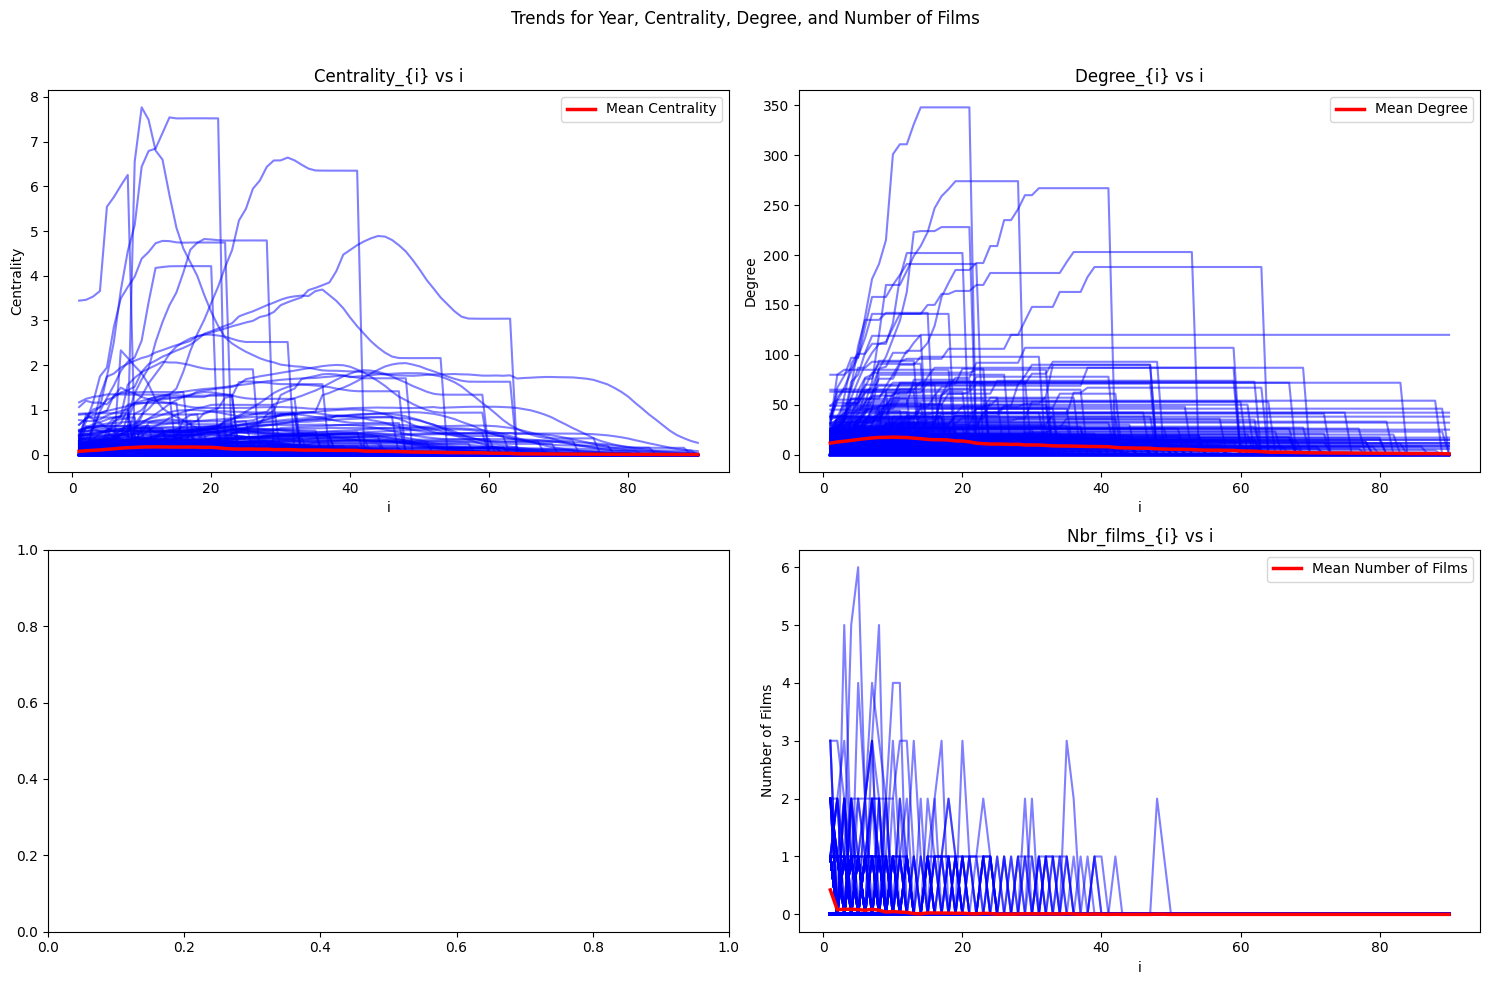

In [125]:
random_actors = Actors_0.sample(n=500)

# Plot the data
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Trends for Year, Centrality, Degree, and Number of Films")

# X-axis: Range from 1 to 90
x = np.arange(1, 91)

# Compute mean curves
mean_centrality = random_actors[[f"Centrality_{i}" for i in range(1, 91)]].mean()
mean_degree = random_actors[[f"Degree_{i}" for i in range(1, 91)]].mean()
mean_nbr_films = random_actors[[f"Nbr_films_{i}" for i in range(1, 91)]].mean()

# Plot Centrality_{i}
for _, actor in random_actors.iterrows():
    axes[0, 0].plot(x, actor[[f"Centrality_{i}" for i in range(1, 91)]], alpha=0.5, color='blue')
axes[0, 0].plot(x, mean_centrality, color='red', linewidth=2.5, label="Mean Centrality")
axes[0, 0].set_title("Centrality_{i} vs i")
axes[0, 0].set_xlabel("i")
axes[0, 0].set_ylabel("Centrality")
axes[0, 0].legend()

# Plot Degree_{i}
for _, actor in random_actors.iterrows():
    axes[0, 1].plot(x, actor[[f"Degree_{i}" for i in range(1, 91)]], alpha=0.5, color='blue')
axes[0, 1].plot(x, mean_degree, color='red', linewidth=2.5, label="Mean Degree")
axes[0, 1].set_title("Degree_{i} vs i")
axes[0, 1].set_xlabel("i")
axes[0, 1].set_ylabel("Degree")
axes[0, 1].legend()

# Plot Nbr_films_{i}
for _, actor in random_actors.iterrows():
    axes[1, 1].plot(x, actor[[f"Nbr_films_{i}" for i in range(1, 91)]], alpha=0.5, color='blue')
axes[1, 1].plot(x, mean_nbr_films, color='red', linewidth=2.5, label="Mean Number of Films")
axes[1, 1].set_title("Nbr_films_{i} vs i")
axes[1, 1].set_xlabel("i")
axes[1, 1].set_ylabel("Number of Films")
axes[1, 1].legend()

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


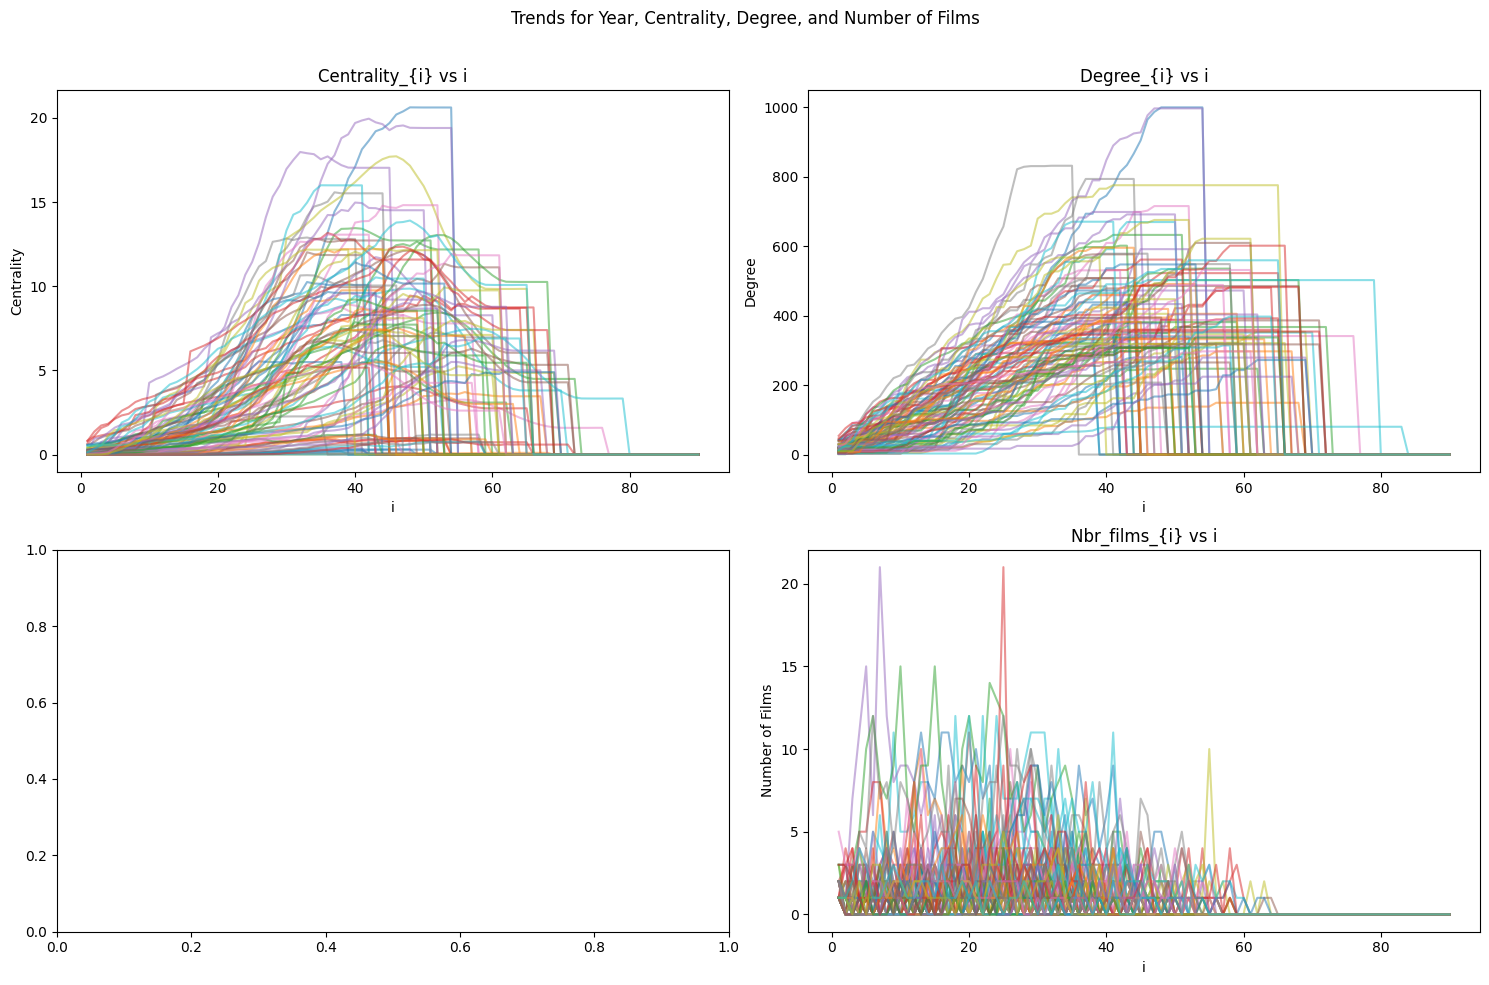

In [54]:
random_actors = Actors_1.sample(n=100)

# Plot the data
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Trends for Year, Centrality, Degree, and Number of Films")

# X-axis: Range from 1 to 90
x = np.arange(1, 91)

# Plot Centrality_{i}
for _, actor in random_actors.iterrows():
    axes[0, 0].plot(x, actor[[f"Centrality_{i}" for i in range(1, 91)]], alpha=0.5)
axes[0, 0].set_title("Centrality_{i} vs i")
axes[0, 0].set_xlabel("i")
axes[0, 0].set_ylabel("Centrality")

# Plot Degree_{i}
for _, actor in random_actors.iterrows():
    axes[0, 1].plot(x, actor[[f"Degree_{i}" for i in range(1, 91)]], alpha=0.5)
axes[0, 1].set_title("Degree_{i} vs i")
axes[0, 1].set_xlabel("i")
axes[0, 1].set_ylabel("Degree")

# Plot Nbr_films_{i}
for _, actor in random_actors.iterrows():
    axes[1, 1].plot(x, actor[[f"Nbr_films_{i}" for i in range(1, 91)]], alpha=0.5)
axes[1, 1].set_title("Nbr_films_{i} vs i")
axes[1, 1].set_xlabel("i")
axes[1, 1].set_ylabel("Number of Films")

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


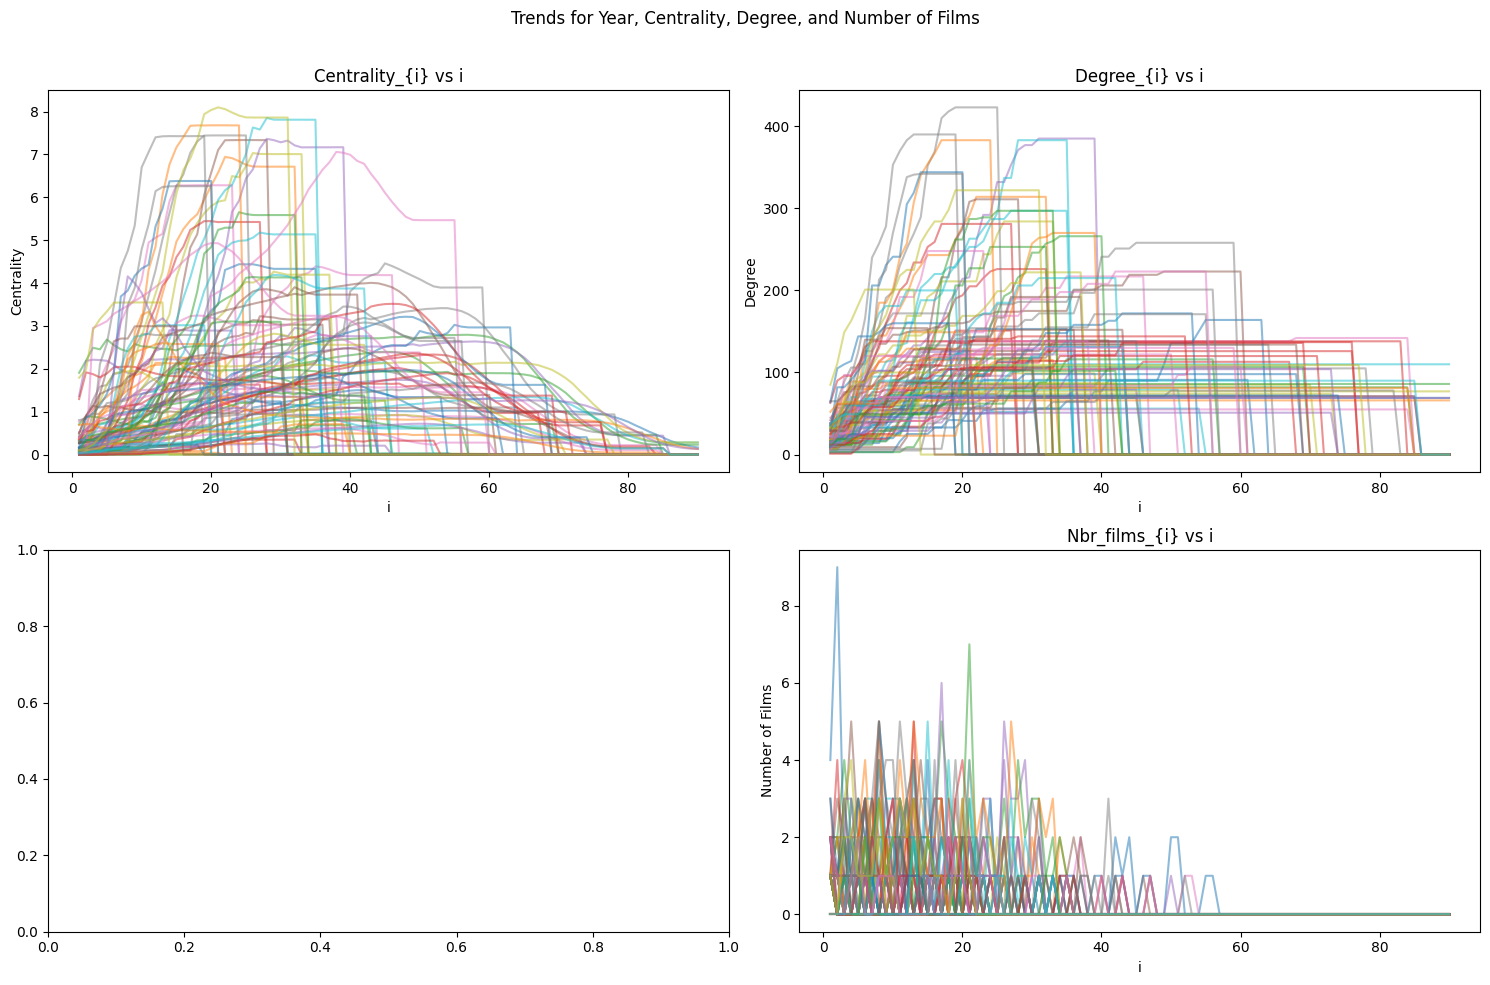

In [55]:
random_actors = Actors_2.sample(n=100)

# Plot the data
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Trends for Year, Centrality, Degree, and Number of Films")

# X-axis: Range from 1 to 90
x = np.arange(1, 91)

# Plot Centrality_{i}
for _, actor in random_actors.iterrows():
    axes[0, 0].plot(x, actor[[f"Centrality_{i}" for i in range(1, 91)]], alpha=0.5)
axes[0, 0].set_title("Centrality_{i} vs i")
axes[0, 0].set_xlabel("i")
axes[0, 0].set_ylabel("Centrality")

# Plot Degree_{i}
for _, actor in random_actors.iterrows():
    axes[0, 1].plot(x, actor[[f"Degree_{i}" for i in range(1, 91)]], alpha=0.5)
axes[0, 1].set_title("Degree_{i} vs i")
axes[0, 1].set_xlabel("i")
axes[0, 1].set_ylabel("Degree")

# Plot Nbr_films_{i}
for _, actor in random_actors.iterrows():
    axes[1, 1].plot(x, actor[[f"Nbr_films_{i}" for i in range(1, 91)]], alpha=0.5)
axes[1, 1].set_title("Nbr_films_{i} vs i")
axes[1, 1].set_xlabel("i")
axes[1, 1].set_ylabel("Number of Films")

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


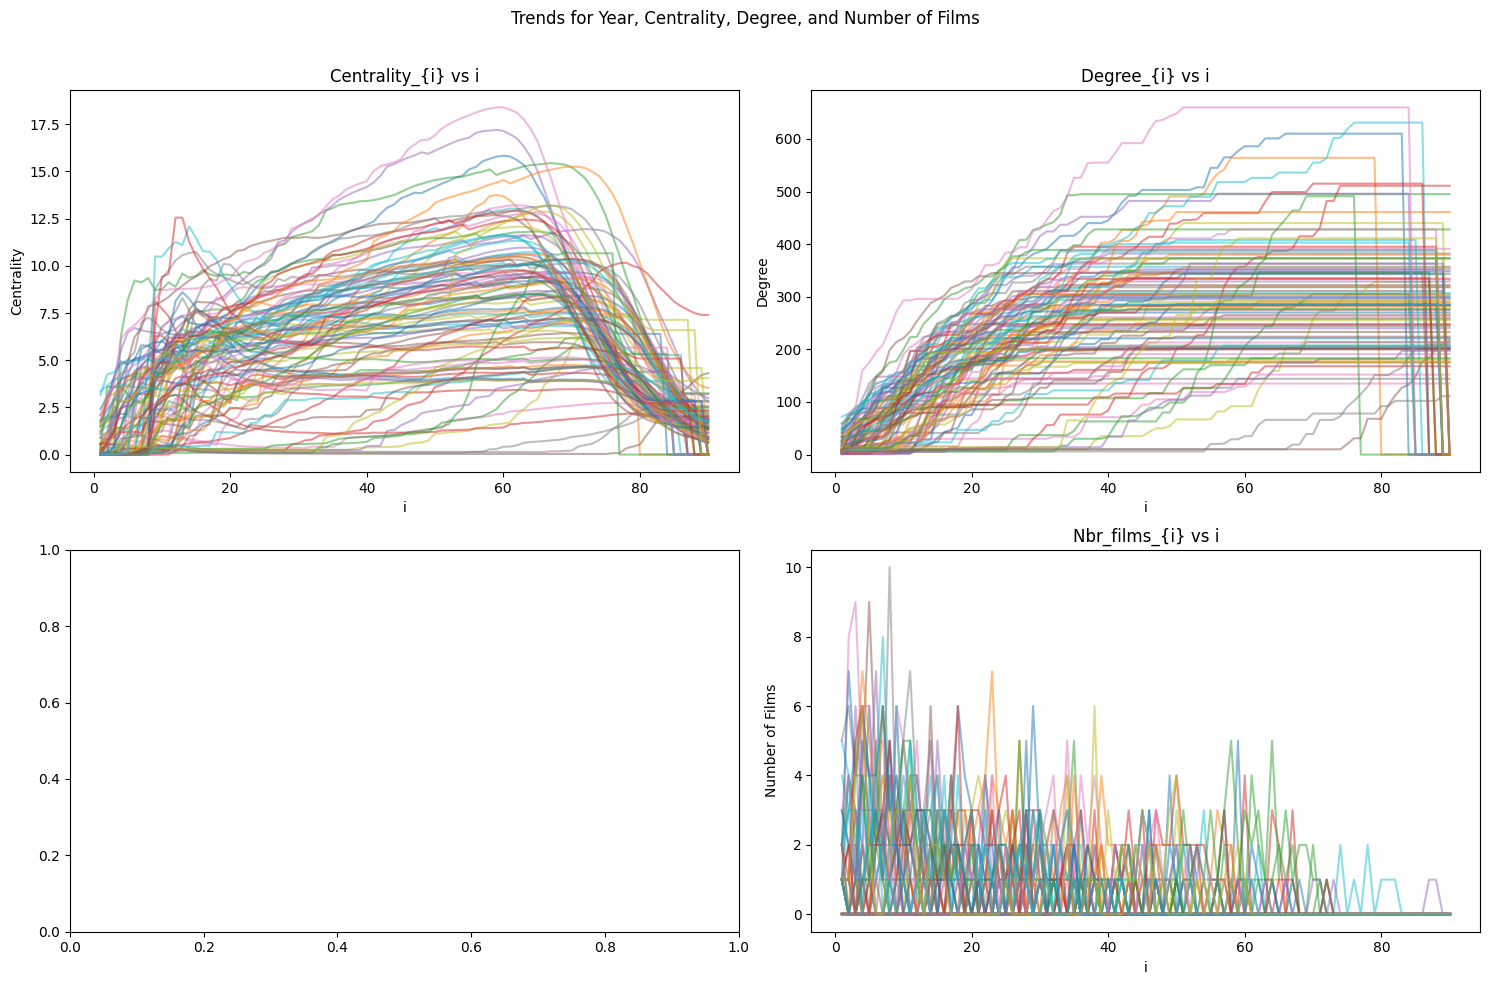

In [56]:
random_actors = Actors_3.sample(n=100)

# Plot the data
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Trends for Year, Centrality, Degree, and Number of Films")

# X-axis: Range from 1 to 90
x = np.arange(1, 91)

# Plot Centrality_{i}
for _, actor in random_actors.iterrows():
    axes[0, 0].plot(x, actor[[f"Centrality_{i}" for i in range(1, 91)]], alpha=0.5)
axes[0, 0].set_title("Centrality_{i} vs i")
axes[0, 0].set_xlabel("i")
axes[0, 0].set_ylabel("Centrality")

# Plot Degree_{i}
for _, actor in random_actors.iterrows():
    axes[0, 1].plot(x, actor[[f"Degree_{i}" for i in range(1, 91)]], alpha=0.5)
axes[0, 1].set_title("Degree_{i} vs i")
axes[0, 1].set_xlabel("i")
axes[0, 1].set_ylabel("Degree")

# Plot Nbr_films_{i}
for _, actor in random_actors.iterrows():
    axes[1, 1].plot(x, actor[[f"Nbr_films_{i}" for i in range(1, 91)]], alpha=0.5)
axes[1, 1].set_title("Nbr_films_{i} vs i")
axes[1, 1].set_xlabel("i")
axes[1, 1].set_ylabel("Number of Films")

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


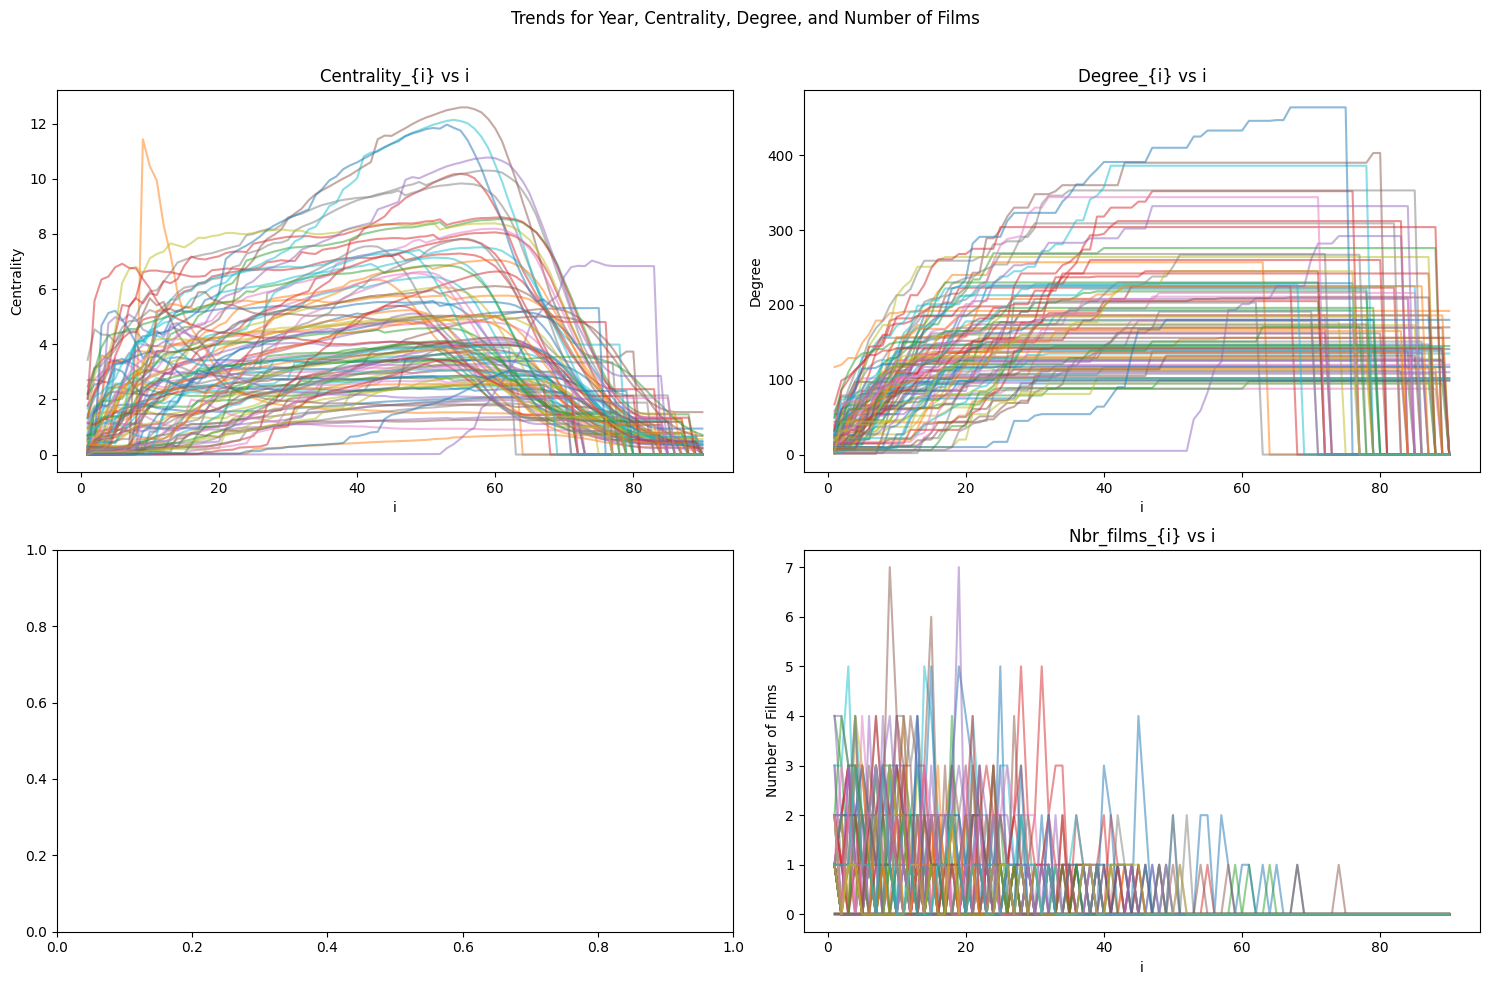

In [58]:
random_actors = Actors_4.sample(n=100)

# Plot the data
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Trends for Year, Centrality, Degree, and Number of Films")

# X-axis: Range from 1 to 90
x = np.arange(1, 91)

# Plot Centrality_{i}
for _, actor in random_actors.iterrows():
    axes[0, 0].plot(x, actor[[f"Centrality_{i}" for i in range(1, 91)]], alpha=0.5)
axes[0, 0].set_title("Centrality_{i} vs i")
axes[0, 0].set_xlabel("i")
axes[0, 0].set_ylabel("Centrality")

# Plot Degree_{i}
for _, actor in random_actors.iterrows():
    axes[0, 1].plot(x, actor[[f"Degree_{i}" for i in range(1, 91)]], alpha=0.5)
axes[0, 1].set_title("Degree_{i} vs i")
axes[0, 1].set_xlabel("i")
axes[0, 1].set_ylabel("Degree")

# Plot Nbr_films_{i}
for _, actor in random_actors.iterrows():
    axes[1, 1].plot(x, actor[[f"Nbr_films_{i}" for i in range(1, 91)]], alpha=0.5)
axes[1, 1].set_title("Nbr_films_{i} vs i")
axes[1, 1].set_xlabel("i")
axes[1, 1].set_ylabel("Number of Films")

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()
